::Kishan Rajoria

# Thermal Overload Protection of Cables:- K-Nearest Neighbors (K-NN)

K-NN is a simple algorithm and likely among the first encountered by people studying machine learning. You simply find the k nearest data points and use their labels to predict the labels of new data points. Here, k is some positive integer less than or equal to the number of data points. The optimal k is typically chosen through cross-validation. Lower values of k gives a more flexible model, while higher values of k give a less flexible model. The optimal value of k depends on how flexible the data generating process is and how much data you have.

K-NN is a non-parametric model. It makes no assumption about the model underlying the data generation process. It does not learn any parameters, unlike a linear model which must “learn” coefficients. This gives it some advantages and disadvantages over more structured models.

The central idea of K-NN is looking at points close to a new point and aggregating the labels of the close points to predict the new point. source:https://towardsdatascience.com/k-nearest-neighbors-k-nn-explained-8959f97a8632

Electrical cables:

Electrical cable has classified as:Incipient Failures of Cables, Failures of Cable Joints, Failure of Cable Terminations, Experimental Results on Cable Insulation Failure.

Causes of the Cable faults:

1. Moisture, grit and/or contamination make a crack in the cable insulation.
2. The crack gradually grows close enough to the core to create a short.
3. Normal aging
4. Accelerated aging (e.g. due to environmental stresses), which may lead to issues such as overheating.
5. Corrosion of the cable-protected insulation.
6. Degradation of the cable insulation.
7. Third-party damage (e.g. someone damaging a cable during excavation work)

Types of Cable Faults

Following are the types of Cable Faults Commonly Found In the underground Cables.

Open-Circuit Faults: Open circuit fault is a kind of fault that occurs as a result of the conductor breaking or the conductor being pulled out of its joint. In such instances, there will be no flow of current at all as the conductor is broken (conveyor of electric current).

Short-circuit or cross fault: This kind of fault occurs when the insulation between two cables or between two multi-core cables gets damaged. In such instances, the current will not flow through the main core which is connected to load but will flow directly from one cable to another or from one core or multi-core cable to the other instead. The load will be short circuited.

Ground or earth faults: This kind of faults occurs when the insulation of the cable gets damaged. The current flowing through the faulty cable starts flowing from the core of the cable to earth or the sheath (cable protector) of the cable. Current will not flow through the load then

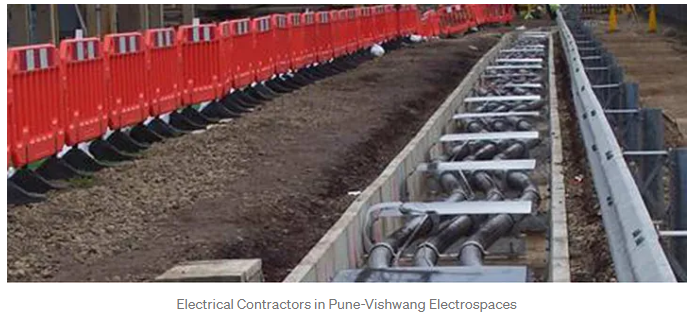

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Cable_amp_km.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
print(X_train)

[[  40  600]
 [  26  160]
 [  47  300]
 [  35  380]
 [  42  530]
 [  49  860]
 [  28  870]
 [  50  360]
 [  35  440]
 [  45  320]
 [  29  750]
 [  28  890]
 [  45  450]
 [  21  680]
 [  54 1040]
 [  38  500]
 [  41  720]
 [  26  430]
 [  40  570]
 [  49 1410]
 [  29  830]
 [  39  420]
 [  39  770]
 [  39  750]
 [  57  740]
 [  34 1150]
 [  21  880]
 [  40  710]
 [  50  200]
 [  35 1470]
 [  35  230]
 [  60 1080]
 [  27  580]
 [  40  750]
 [  38  550]
 [  30  150]
 [  47  200]
 [  37 1440]
 [  48 1340]
 [  20  820]
 [  35  390]
 [  36 1180]
 [  23  660]
 [  31  680]
 [  41  520]
 [  30  800]
 [  52  210]
 [  40 1070]
 [  39  730]
 [  31  580]
 [  48  740]
 [  31  710]
 [  44 1390]
 [  31  740]
 [  38  500]
 [  33  690]
 [  42  540]
 [  32  180]
 [  37 1460]
 [  46  590]
 [  42  790]
 [  33 1130]
 [  23  280]
 [  57  600]
 [  35  720]
 [  24  320]
 [  39  790]
 [  29 1480]
 [  28  590]
 [  26  300]
 [  35  600]
 [  42 1040]
 [  37  700]
 [  59  290]
 [  39  960]
 [  43 1290]
 [  30 1070]

In [6]:
print(y_train)

[0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1
 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1
 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1
 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 0]


In [7]:
print(X_test)

[[  33  510]
 [  47  250]
 [  49  880]
 [  37  800]
 [  40  570]
 [  26  150]
 [  35  730]
 [  41  720]
 [  34  250]
 [  38  710]
 [  24  190]
 [  33 1490]
 [  31  890]
 [  50  440]
 [  20  860]
 [  26  840]
 [  45 1310]
 [  34 1120]
 [  37  790]
 [  37  740]
 [  35  790]
 [  41  870]
 [  32 1170]
 [  49  280]
 [  35  550]
 [  47  470]
 [  28  440]
 [  20  820]
 [  43 1120]
 [  30 1350]
 [  35  970]
 [  46  820]
 [  48  330]
 [  39  610]
 [  27  570]
 [  27  890]
 [  29  800]
 [  35  610]
 [  36  750]
 [  60  420]
 [  30  490]
 [  47  230]
 [  19  760]
 [  18  440]
 [  46  280]
 [  26  810]
 [  56  600]
 [  41  300]
 [  35  590]
 [  39 1220]
 [  40  570]
 [  34  720]
 [  45  790]
 [  35  770]
 [  42  540]
 [  47  510]
 [  26  720]
 [  19  260]
 [  22  810]
 [  25  870]
 [  27  200]
 [  42 1490]
 [  18  860]
 [  52 1140]
 [  37  550]
 [  55  390]
 [  34  430]
 [  19  190]
 [  35  250]
 [  47  490]
 [  19  210]
 [  41  520]
 [  27 1370]
 [  21  720]
 [  30  870]
 [  20  490]
 [  53  720]

In [8]:
print(y_test)

[0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1]


## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[ 0.20254208 -0.30834289]
 [-1.15636644 -1.60497437]
 [ 0.88199634 -1.19240981]
 [-0.28278239 -0.95665863]
 [ 0.39667187 -0.51462517]
 [ 1.07612613  0.45784843]
 [-0.96223665  0.48731733]
 [ 1.17319102 -1.01559642]
 [-0.28278239 -0.77984525]
 [ 0.68786655 -1.13347201]
 [-0.86517176  0.13369056]
 [-0.96223665  0.54625512]
 [ 0.68786655 -0.75037635]
 [-1.64169091 -0.07259172]
 [ 1.5614506   0.98828858]
 [ 0.00841229 -0.60303186]
 [ 0.29960697  0.04528387]
 [-1.15636644 -0.80931414]
 [ 0.20254208 -0.39674958]
 [ 1.07612613  2.07863777]
 [-0.86517176  0.36944174]
 [ 0.10547719 -0.83878304]
 [ 0.10547719  0.19262836]
 [ 0.10547719  0.13369056]
 [ 1.85264528  0.10422167]
 [-0.37984729  1.31244645]
 [-1.64169091  0.51678623]
 [ 0.20254208  0.01581497]
 [ 1.17319102 -1.48709878]
 [-0.28278239  2.25545115]
 [-0.28278239 -1.39869209]
 [ 2.14383997  1.10616417]
 [-1.05930155 -0.36728069]
 [ 0.20254208  0.13369056]
 [ 0.00841229 -0.45568738]
 [-0.76810686 -1.63444326]
 [ 0.88199634 -1.48709878]
 

In [11]:
print(X_test)

[[-0.47691218 -0.57356297]
 [ 0.88199634 -1.33975429]
 [ 1.07612613  0.51678623]
 [-0.0886526   0.28103505]
 [ 0.20254208 -0.39674958]
 [-1.15636644 -1.63444326]
 [-0.28278239  0.07475277]
 [ 0.29960697  0.04528387]
 [-0.37984729 -1.33975429]
 [ 0.00841229  0.01581497]
 [-1.35049623 -1.51656767]
 [-0.47691218  2.31438895]
 [-0.67104197  0.54625512]
 [ 1.17319102 -0.77984525]
 [-1.73875581  0.45784843]
 [-1.15636644  0.39891064]
 [ 0.68786655  1.7839488 ]
 [-0.37984729  1.22403976]
 [-0.0886526   0.25156615]
 [-0.0886526   0.10422167]
 [-0.28278239  0.25156615]
 [ 0.29960697  0.48731733]
 [-0.57397707  1.37138424]
 [ 1.07612613 -1.2513476 ]
 [-0.28278239 -0.45568738]
 [ 0.88199634 -0.69143856]
 [-0.96223665 -0.77984525]
 [-1.73875581  0.33997284]
 [ 0.49373676  1.22403976]
 [-0.76810686  1.90182439]
 [-0.28278239  0.7820063 ]
 [ 0.78493145  0.33997284]
 [ 0.97906123 -1.10400311]
 [ 0.10547719 -0.278874  ]
 [-1.05930155 -0.39674958]
 [-1.05930155  0.54625512]
 [-0.86517176  0.28103505]
 

## Training the K-NN model on the Training set

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting a new result

In [13]:
print(classifier.predict(sc.transform([[30,87000]])))

[1]


## Predicting the Test set results

In [14]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[58  7]
 [ 3 32]]


0.9

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


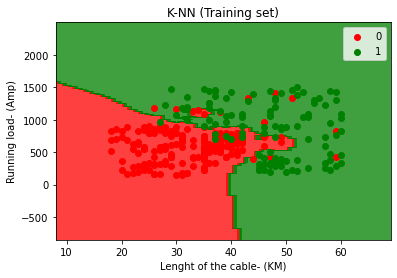

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Lenght of the cable- (KM)')
plt.ylabel('Running load- (Amp)')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


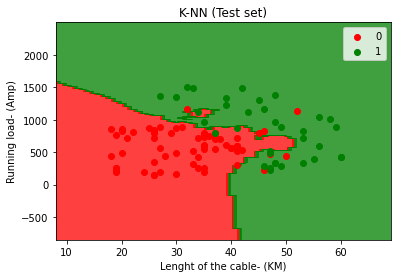

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Lenght of the cable- (KM)')
plt.ylabel('Running load- (Amp)')
plt.legend()
plt.show()

Conclusion –
The methods mentioned above helps to locate the cable faults. It has become more efficient, less time consuming to fix the issues, and has minimized the possibility of the electricity cable faults.